In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/KITTI/05'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.VGG16_Weights
model = models.vgg16(weights=weights)
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
        outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
        output_.append(outputs)
        if i > max_:
          return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
      outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,56):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*100
    max_ = n_it*100
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_kitti_05_vgg16_original_original/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 38)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55]
d = []

In [ ]:
co = 0
for bg in database:
  
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      with open('/content/drive/MyDrive/Datasets/KITTI/loop_kitti_05_vgg16_original_v1.txt', 'a') as txt_file:
        if loop_ > 0:
          txt_file.write('Found loop')
          image_number = round(((co*100)+i)/2,0)
          txt_file.write('\n image: '+str(image_number))
          txt_file.write('\n')
        else:
          d.append(data)
  co += 1


A saída de streaming foi truncada nas últimas 5000 linhas.
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0807,  ..., 0.0000, 0.0000, 1.5436]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6318]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.1812]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]],
       requires_grad=True)
loop
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.7808]]

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/kitti_05_vgg16_original.csv')


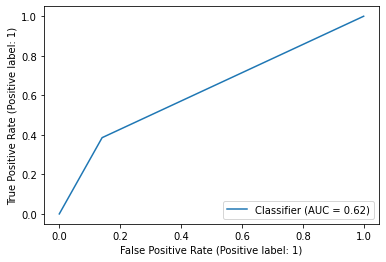

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.622540054450549
Accuracy:  0.8015211879753712
f1:  0.3217821782178218


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[2083,  341],
       [ 207,  130]])